# Computation of historic metrics for the continental US

In [14]:
import os
import sys
import pathlib
from pathlib import Path
import json

dir_preprocessing = os.path.join(str(pathlib.Path().resolve()))
sys.path.append(dir_preprocessing)

import functions as fct

In [15]:
geo_area = 'us'

with open(f'config_{geo_area}.json', 'r') as file:
    config_data = json.load(file)

CROPS_DICT contains the seasons in function of the different crops for the selected geographical area:

In [16]:
crops_dict = config_data['study_area']['crops_dict']
crops = list(config_data['study_area']['crops_dict'].keys())
print(crops)

['wheat', 'maize', 'soybean']


## Mean temperature in spring and summer

Create dataset containing monthly values for the entire time period and all pre-defined temperature metrics:

In [17]:
tasmax_data_path = Path(config_data['input']['tasmax'])
lon = config_data['study_area']['lon']
lat_orig = config_data['study_area']['lat']
lat = [lat_orig[1], lat_orig[0]]
months = config_data['study_area']['months']
years = config_data['study_area']['his_years']
t_monthly = fct.monthly_means_from_annual_files(tasmax_data_path, lon, lat, months, years, 
                                                    save=True, filenames_dict=config_data)

Processing file tmax.1980.nc
Processing file tmax.1981.nc
Processing file tmax.1982.nc
Processing file tmax.1983.nc
Processing file tmax.1984.nc
Processing file tmax.1985.nc
Processing file tmax.1986.nc
Processing file tmax.1987.nc
Processing file tmax.1988.nc
Processing file tmax.1989.nc
Processing file tmax.1990.nc
Processing file tmax.1991.nc
Processing file tmax.1992.nc
Processing file tmax.1993.nc
Processing file tmax.1994.nc
Processing file tmax.1995.nc
Processing file tmax.1996.nc
Processing file tmax.1997.nc
Processing file tmax.1998.nc
Processing file tmax.1999.nc
Processing file tmax.2000.nc
Processing file tmax.2001.nc
Processing file tmax.2002.nc
Processing file tmax.2003.nc
Processing file tmax.2004.nc
Processing file tmax.2005.nc
Processing file tmax.2006.nc
Processing file tmax.2007.nc
Processing file tmax.2008.nc
Processing file tmax.2009.nc
Processing file tmax.2010.nc
Processing file tmax.2011.nc
Processing file tmax.2012.nc
Processing file tmax.2013.nc
Processing fil

RuntimeError: NetCDF: Invalid argument

In [5]:
t_monthly

<xarray.Dataset>
Dimensions:       (lon: 118, lat: 52, year: 42, month: 6)
Coordinates:
  * lon           (lon) float32 -124.8 -124.2 -123.8 ... -67.25 -66.75 -66.25
  * lat           (lat) float32 49.75 49.25 48.75 48.25 ... 25.25 24.75 24.25
  * month         (month) int64 3 4 5 6 7 8
  * year          (year) int64 1980 1981 1982 1983 1984 ... 2018 2019 2020 2021
Data variables:
    monthly_mean  (year, month, lat, lon) float32 6.579 5.788 3.366 ... nan nan
Attributes:
    CDI:            Climate Data Interface version 2.0.5 (https://mpimet.mpg....
    Conventions:    CF-1.0
    version:        V1.0
    history:        Tue Sep 27 16:51:16 2022: cdo delete,timestep=60 tmax.198...
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...
    CDO:            Climate Data Operators version 2.0.5 (https://mpimet.mpg....

In [7]:
t_annual = fct.annual_seasonal_means(t_monthly, crops_dict, True, config_data)

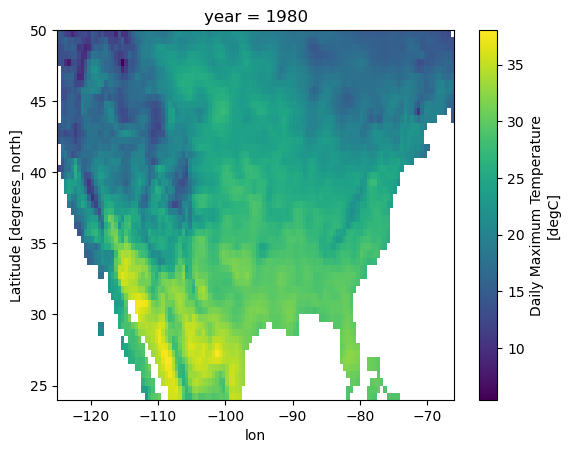

In [8]:
t_annual['maize_spring'].isel(year=0).plot()

## Mean soil moisture in spring and summer

In [11]:
variable = 'SMroot'
output_file = config_data['calc_his']['annual_file'].format(variable=variable)
sm_annual = fct.metrics_from_timperiod(Path(config_data['input']['gleam']), lon, 
                                           lat, crops_dict, variable, output_file)

In [12]:
sm_annual

<xarray.Dataset>
Dimensions:         (lon: 118, lat: 52, year: 42)
Coordinates:
  * lon             (lon) float64 -124.8 -124.2 -123.8 ... -67.25 -66.75 -66.25
  * lat             (lat) float64 49.75 49.25 48.75 48.25 ... 25.25 24.75 24.25
  * year            (year) int64 1980 1981 1982 1983 ... 2018 2019 2020 2021
Data variables:
    wheat_spring    (year, lat, lon) float32 0.2108 0.2575 0.3362 ... nan nan
    wheat_summer    (year, lat, lon) float32 0.1332 0.2315 0.3256 ... nan nan
    maize_spring    (year, lat, lon) float32 0.1332 0.2315 0.3256 ... nan nan
    maize_summer    (year, lat, lon) float32 0.1133 0.216 0.3098 ... nan nan nan
    soybean_spring  (year, lat, lon) float32 0.1332 0.2315 0.3256 ... nan nan
    soybean_summer  (year, lat, lon) float32 0.1133 0.216 0.3098 ... nan nan nan

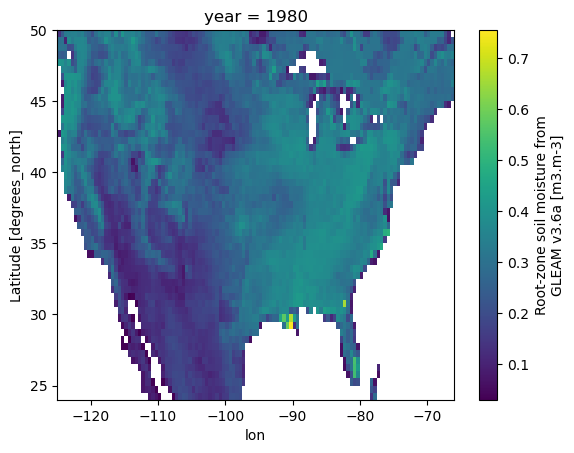

In [13]:
sm_annual['maize_spring'].isel(year=0).plot()